# Problem 2: System Power Prediction

## Question 1

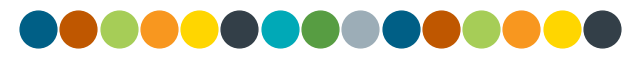

In [221]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# https://brand.utexas.edu/identity/color/
import random
from cycler import cycler

random.Random(12).shuffle(colors := '#bf5700 #f8971f #ffd600 #a6cd57 #579d42 #00a9b7 #005f86 #9cadb7 #333f48'.split(' '))
plt.figure(figsize=(8,0.5))
for i in range(15): plt.scatter(i,0,s=700)
plt.axis('off')
plt.show()
plt.rc('axes', prop_cycle=cycler(color=colors))

In [222]:
def my_save_fig(filename):
    IMAGE_DIRECTORY = r'../images/'
    plt.savefig(IMAGE_DIRECTORY+filename, bbox_inches='tight')

In [223]:
# Read the train data
train = pd.read_csv(r'training_dataset.csv')
target = np.where(train['w_big'] > 1, 1, 0)
train = train.drop("w_big", axis= 'columns')

# Read the test data
blackscholes = pd.read_csv(r'testing_blackscholes.csv')
blackscholes_target = np.where(blackscholes['w_big'] > 1, 1, 0)
blackscholes = blackscholes.drop("w_big", axis= 'columns')

bodytrack = pd.read_csv(r'testing_bodytrack.csv')
bodytrack_target = np.where(bodytrack['w_big'] > 1, 1, 0)
bodytrack = bodytrack.drop("w_big", axis= 'columns')

In [224]:
train.head()

,total_watts,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,2.706,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,2.706,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,2.637,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,2.637,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000


In [225]:
#recommended data transforms
for i in range(4, 8):
    train[f'temp{i}'] = train[f'temp{i}'] / 100
    blackscholes[f'temp{i}'] = blackscholes[f'temp{i}'] / 100
    bodytrack[f'temp{i}'] = bodytrack[f'temp{i}'] / 100

train['temp_gpu'] = train['temp_gpu'] / 100
blackscholes['temp_gpu'] = blackscholes['temp_gpu'] / 100
bodytrack['temp_gpu'] = bodytrack['temp_gpu'] / 100

train['freq_big_cluster'] = train['freq_big_cluster'] / 1000000
blackscholes['freq_big_cluster'] = blackscholes['freq_big_cluster'] / 1000000
bodytrack['freq_big_cluster'] = bodytrack['freq_big_cluster'] / 1000000


In [226]:
import sklearn.svm as svm
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

clf = svm.SVC(kernel='linear') 
clf.fit(train, target)

SVC(kernel='linear')

BlackScholes
Accuracy:  0.999395039322444
Precision:  1.0
Recall:  0.9990892531876139
F1:  0.9995444191343964


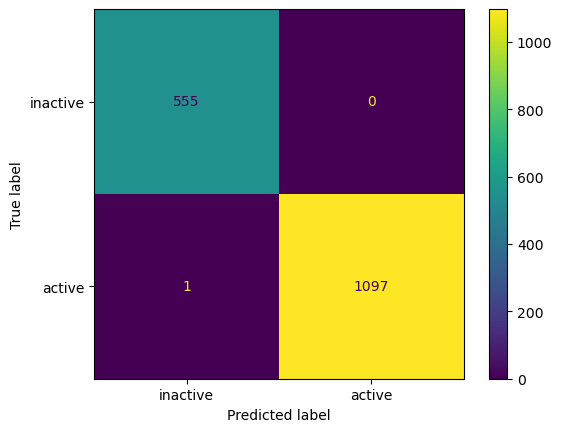

BodyTrack
Accuracy:  0.9993122420907841
Precision:  0.9988998899889989
Recall:  1.0
F1:  0.9994496422674739


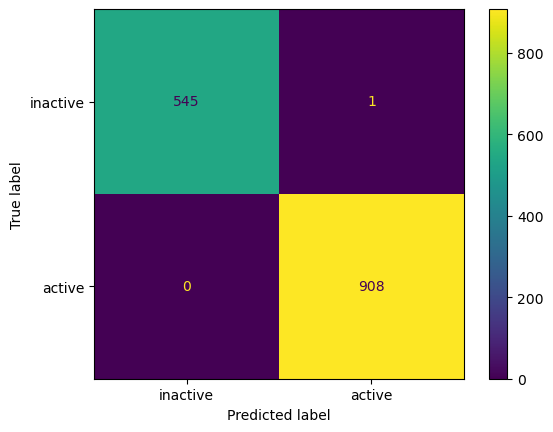

In [227]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

bspreds = clf.predict(blackscholes)
btpreds = clf.predict(bodytrack)

bscm = confusion_matrix(blackscholes_target, bspreds)
btc = confusion_matrix(bodytrack_target, btpreds)

print("BlackScholes")
print("Accuracy: ", accuracy_score(blackscholes_target, bspreds))
print("Precision: ", precision_score(blackscholes_target, bspreds))
print("Recall: ", recall_score(blackscholes_target, bspreds))
print("F1: ", f1_score(blackscholes_target, bspreds))
disp = ConfusionMatrixDisplay(confusion_matrix=bscm, display_labels=["inactive", "active"])
disp.plot()
my_save_fig('blk_confusion.pdf')
plt.show()

print("BodyTrack")
print("Accuracy: ", accuracy_score(bodytrack_target, btpreds))
print("Precision: ", precision_score(bodytrack_target, btpreds))
print("Recall: ", recall_score(bodytrack_target, btpreds))
print("F1: ", f1_score(bodytrack_target, btpreds))
disp = ConfusionMatrixDisplay(confusion_matrix=btc, display_labels=["inactive", "active"])
disp.plot()
my_save_fig('body_confusion.pdf')
plt.show()

## Question 2

In [228]:
from sklearn.linear_model import LinearRegression
train = pd.read_csv(r'training_dataset.csv').iloc[:,5: 15]
target = pd.read_csv(r'training_dataset.csv')['w_big']

blackscholes = pd.read_csv(r'testing_blackscholes.csv').iloc[:,5: 15]
blackscholes_target = pd.read_csv(r'testing_blackscholes.csv')['w_big']

bodytrack = pd.read_csv(r'testing_bodytrack.csv').iloc[:,5: 15]
bodytrack_target = pd.read_csv(r'testing_bodytrack.csv')['w_big']

In [229]:
train.head()

,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000


In [230]:
#recommended data transforms
for i in range(4, 8):
    train[f'temp{i}'] = train[f'temp{i}'] / 100
    blackscholes[f'temp{i}'] = blackscholes[f'temp{i}'] / 100
    bodytrack[f'temp{i}'] = bodytrack[f'temp{i}'] / 100

train['temp_gpu'] = train['temp_gpu'] / 100
blackscholes['temp_gpu'] = blackscholes['temp_gpu'] / 100
bodytrack['temp_gpu'] = bodytrack['temp_gpu'] / 100

train['freq_big_cluster'] = train['freq_big_cluster'] / 1000000
blackscholes['freq_big_cluster'] = blackscholes['freq_big_cluster'] / 1000000
bodytrack['freq_big_cluster'] = bodytrack['freq_big_cluster'] / 1000000

In [231]:
linmod = LinearRegression().fit(train, target)

In [232]:
from sklearn.metrics import mean_squared_error, r2_score

print("Training")
print("R2: ", r2_score(target, linmod.predict(train)))
print("MSE: ", mean_squared_error(target, linmod.predict(train)))

print("BlackScholes")
print("R2: ", r2_score(blackscholes_target, linmod.predict(blackscholes)))
print("MSE: ", mean_squared_error(blackscholes_target, linmod.predict(blackscholes)))

print("BodyTrack")
print("R2: ", r2_score(bodytrack_target, linmod.predict(bodytrack)))
print("MSE: ", mean_squared_error(bodytrack_target, linmod.predict(bodytrack)))


Training
R2:  0.9869761626648631
MSE:  0.010151781665943486
BlackScholes
R2:  0.9566269821839003
MSE:  0.059418145336263696
BodyTrack
R2:  0.9224313620150344
MSE:  0.12156466064083095


In [233]:
graphics = {'BlackScholes':(blackscholes_target, linmod.predict(blackscholes)),
    'BodyTrack':(bodytrack_target, linmod.predict(bodytrack))}

def plot_graphic(name, y1, y2, filename=None):
    plt.figure(figsize=(8,2))
    plt.plot(y2, label='Actual')
    plt.plot(y1, label='Predicted')
    plt.title(f'True vs. Predicted Power Values for {name} Test')
    plt.legend()
    plt.grid()
    plt.xlabel('Time (s)')
    plt.ylabel('Power (W)')
    plt.ylim(bottom=0.0)
    if filename is not None: my_save_fig(filename)
    plt.show()

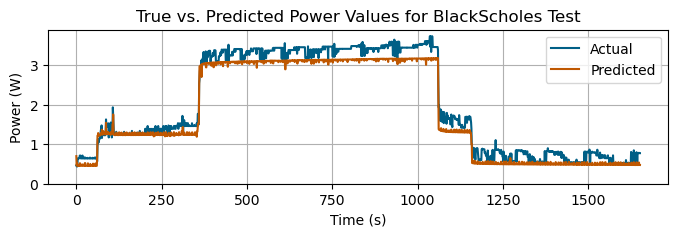

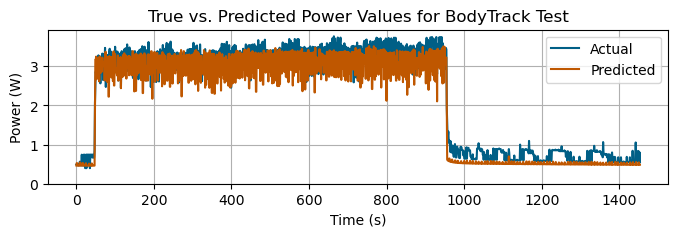

In [234]:
# for g in graphics: plot_graphic(g, *graphics[g])
for g in graphics: plot_graphic(g, *graphics[g], g.lower()+'_linreg.pdf')

## Question 3

In [235]:
freq_to_vdd = {900.0:0.975, 1000.0:1.0, 1500.0:1.1375, 2000.0:1.362}

train['dynamic_power'] = [i*(freq_to_vdd[i]**2)/1000 for i in train['freq_big_cluster']] 
blackscholes['dynamic_power'] = [i*(freq_to_vdd[i]**2)/1000 for i in blackscholes['freq_big_cluster']]
bodytrack['dynamic_power'] = [i*(freq_to_vdd[i]**2)/1000 for i in bodytrack['freq_big_cluster']]

In [236]:
train.head()

,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster,dynamic_power
0,0.0,0.0,0.0,0.0,0.49,0.53,0.52,0.48,0.47,1000.0,1.0
1,0.0,0.0,0.0,0.0,0.48,0.52,0.52,0.48,0.47,1000.0,1.0
2,0.0,0.0,0.0,0.0,0.48,0.52,0.52,0.48,0.47,1000.0,1.0
3,0.0,0.0,0.0,0.0,0.48,0.51,0.51,0.48,0.47,1000.0,1.0
4,0.0,0.0,0.0,0.0,0.48,0.51,0.51,0.48,0.47,1000.0,1.0


In [237]:
# linmod = LinearRegression().fit(train, target)
linmod = make_pipeline(preprocessing.RobustScaler(), LinearRegression()).fit(train, target)

print("Training")
print("R2: ", r2_score(target, linmod.predict(train)))
print("MSE: ", mean_squared_error(target, linmod.predict(train)))

print("BlackScholes")
print("R2: ", r2_score(blackscholes_target, linmod.predict(blackscholes)))
print("MSE: ", mean_squared_error(blackscholes_target, linmod.predict(blackscholes)))

print("BodyTrack")
print("R2: ", r2_score(bodytrack_target, linmod.predict(bodytrack)))
print("MSE: ", mean_squared_error(bodytrack_target, linmod.predict(bodytrack)))

Training
R2:  0.9870205214889813
MSE:  0.010117204982757278
BlackScholes
R2:  0.9247154009603336
MSE:  0.10313488598574751
BodyTrack
R2:  0.9097567386891245
MSE:  0.14142818181885167


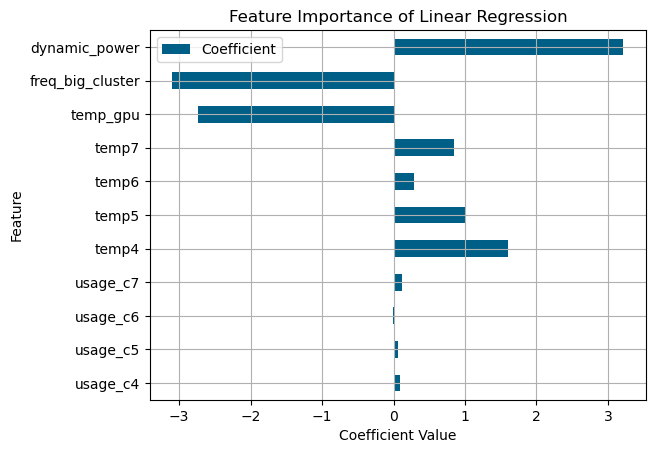

In [238]:
df = pd.DataFrame(linmod[1].coef_, index=train.columns, columns=['Coefficient'])
df.plot(kind='barh')
plt.title("Feature Importance of Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
my_save_fig('linreg_importance.pdf')
plt.grid()

We can see that the top 3 predictors for the power consumption by the big cluster are the dynamic power, the frequency of the big cluster, and the temperature of the GPU. This makes sense, because the cluster power consumption should directly correlate with the dynamic power and frequency, and the gpu temperature is likely affected significantly by the heat output of the cluster as a whole.